<a href="https://colab.research.google.com/github/juliaschubertpeixoto/TCC/blob/main/%5BCROSS_SUBJECT%5D_NTU_RGB%2BD_12_gestures_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.utils import shuffle
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models

#Data Processing

##Load Data

In [ ]:
path = '/content/drive/MyDrive/artigo_IEEE/datasets/NTU-RGB-D cross subject data'
os.chdir(path)
X_train = np.load('train_data.npy' ).astype(np.float32)
y_train = np.load('train_tag.npy' ).astype(np.int32)
X_eval = np.load('eval_data.npy' ).astype(np.float32)
y_eval = np.load('eval_tag.npy' ).astype(np.int32)
print("Data imported successfuly!")

Data imported successfuly!


##Split Data

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=42)
print("Data splited successfuly!")
print(" ")
print("Number of samples on training set:", y_train.shape[0])
print("Number of samples on validation set:", y_val.shape[0])
print("Number of samples on test set:", y_test.shape[0] )

Data splited successfuly!
 
Number of samples on training set: 7991
Number of samples on validation set: 1642
Number of samples on test set: 1642


##Normalize data

In [ ]:
new_train_data = tf.reshape(X_train, (-1,299*80)) 
n = MaxAbsScaler() 
n.fit(new_train_data)
newN = n.transform(new_train_data)
X_train = tf.reshape(newN, (-1,299,80))
print("Data normalized successfuly!")

Data normalized successfuly!


In [ ]:
new_train_data = tf.reshape(X_val, (-1,299*80))
newN = n.transform(new_train_data)
X_val = tf.reshape(newN, (-1,299,80))
print("Data normalized successfuly!")

Data normalized successfuly!


In [ ]:
new_train_data = tf.reshape(X_test, (-1,299*80))
newN = n.transform(new_train_data)
X_test = tf.reshape(newN, (-1,299,80))
print("Data normalized successfuly!")

Data normalized successfuly!


##Reshape Data

In [ ]:
train_data_conv = tf.reshape(X_train, (-1,299,80,1))
val_data_conv = tf.reshape(X_val, (-1,299,80,1))
test_data_conv = tf.reshape(X_test, (-1,299,80,1))
print("Data reshaped successfuly!")

Data reshaped successfuly!


#Convolutional Neural Network

##Training

*Proposed Model*

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(299,80,1)))
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3, 3), strides=3))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3, 3), strides=3))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=7104, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(units=12, activation='softmax'))
model.summary()

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 299, 80, 16)       160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 26, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 99, 26, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 33, 8, 32)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 33, 8, 64)         18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 4, 64)       

*Training*

In [ ]:
history = model.fit(train_data_conv, y_train,
          validation_data=(val_data_conv, y_val),
          batch_size=10,
          epochs=30, shuffle=True)

Epoch 1/30
800/800 [==============================] - 19s 23ms/step - loss: 2.4864 - accuracy: 0.0887 - val_loss: 2.3744 - val_accuracy: 0.1815
Epoch 2/30
800/800 [==============================] - 18s 22ms/step - loss: 1.6741 - accuracy: 0.4151 - val_loss: 1.2696 - val_accuracy: 0.5499
Epoch 3/30
800/800 [==============================] - 18s 22ms/step - loss: 1.1400 - accuracy: 0.5975 - val_loss: 1.2619 - val_accuracy: 0.5786
Epoch 4/30
800/800 [==============================] - 18s 23ms/step - loss: 1.0085 - accuracy: 0.6454 - val_loss: 1.0571 - val_accuracy: 0.6309
Epoch 5/30
800/800 [==============================] - 18s 23ms/step - loss: 0.9299 - accuracy: 0.6680 - val_loss: 1.0790 - val_accuracy: 0.6443
Epoch 6/30
800/800 [==============================] - 18s 22ms/step - loss: 0.8712 - accuracy: 0.6895 - val_loss: 1.0344 - val_accuracy: 0.6492
Epoch 7/30
800/800 [==============================] - 18s 22ms/step - loss: 0.8237 - accuracy: 0.7022 - val_loss: 1.1111 - val_accuracy:

###Analysis

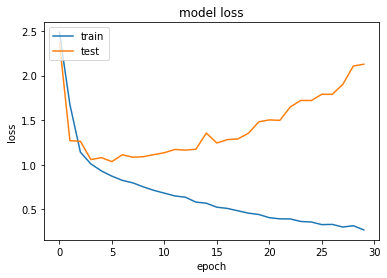

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

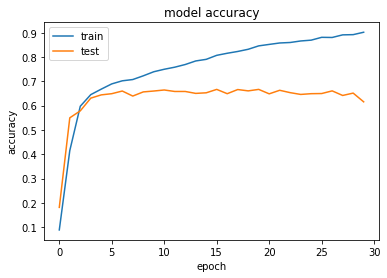

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

##Testing

In [ ]:
y_pred = model.predict(test_data_conv)
new_pred = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
  new_pred[i] = np.argmax(y_pred[i])
print("Testing Accuracy: ", sklearn.metrics.accuracy_score(y_true=y_test, y_pred=new_pred))

Testing Accuracy:  0.6224116930572473


In [ ]:
print(sklearn.metrics.classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           0       0.44      0.55      0.49       141
           1       0.44      0.31      0.37       144
           2       0.57      0.35      0.44       133
           3       0.54      0.52      0.53       132
           4       0.83      0.66      0.74       137
           5       0.88      0.98      0.93       126
           6       0.74      0.66      0.70       155
           7       0.99      0.90      0.94       124
           8       0.89      0.94      0.92       142
           9       0.46      0.68      0.55       128
          10       0.38      0.60      0.47       132
          11       0.52      0.38      0.44       148

    accuracy                           0.62      1642
   macro avg       0.64      0.63      0.62      1642
weighted avg       0.64      0.62      0.62      1642



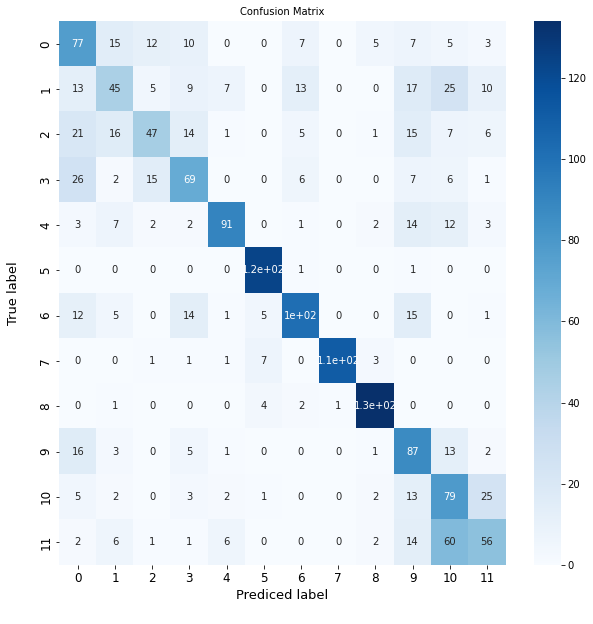

In [ ]:
import seaborn as sns
cm = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=new_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title("Confusion Matrix", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.ylabel('True label\n', fontsize=13)
plt.xlabel('Prediced label\n', fontsize=13)
plt.show()

In [ ]:
for i in range(len(cm)):
  den = sum(cm[i])
  num = cm[i][i]
  accuracy = num/den
  print("Accuracy for gesture", i)
  print(str(accuracy*100)+"%")
  print(' ')

Accuracy for gesture 0
54.60992907801418%
 
Accuracy for gesture 1
31.25%
 
Accuracy for gesture 2
35.338345864661655%
 
Accuracy for gesture 3
52.27272727272727%
 
Accuracy for gesture 4
66.42335766423358%
 
Accuracy for gesture 5
98.4126984126984%
 
Accuracy for gesture 6
65.80645161290323%
 
Accuracy for gesture 7
89.51612903225806%
 
Accuracy for gesture 8
94.36619718309859%
 
Accuracy for gesture 9
67.96875%
 
Accuracy for gesture 10
59.84848484848485%
 
Accuracy for gesture 11
37.83783783783784%
 


#Recurrent Neural Network

##Training

*Model*

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape=(299,80)),   
tf.keras.layers.LSTM(128, return_sequences=True),
tf.keras.layers.LSTM(128, dropout=0.1),
tf.keras.layers.Dense(12, activation='softmax')
])

model.compile(optimizer = 'RMSProp',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 299, 128)          107008    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_4 (Dense)             (None, 12)                1548      
                                                                 
Total params: 240,140
Trainable params: 240,140
Non-trainable params: 0
_________________________________________________________________


*Training*

In [ ]:
history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          batch_size=10,
          epochs=30, shuffle=True)

Epoch 1/30
800/800 [==============================] - 105s 126ms/step - loss: 2.0857 - accuracy: 0.2512 - val_loss: 2.5861 - val_accuracy: 0.2570
Epoch 2/30
800/800 [==============================] - 100s 125ms/step - loss: 1.8858 - accuracy: 0.3327 - val_loss: 1.5961 - val_accuracy: 0.4178
Epoch 3/30
800/800 [==============================] - 102s 128ms/step - loss: 1.6304 - accuracy: 0.4341 - val_loss: 1.7066 - val_accuracy: 0.3946
Epoch 4/30
800/800 [==============================] - 101s 126ms/step - loss: 1.4565 - accuracy: 0.4889 - val_loss: 1.3855 - val_accuracy: 0.5225
Epoch 5/30
800/800 [==============================] - 100s 125ms/step - loss: 1.3677 - accuracy: 0.5212 - val_loss: 1.3143 - val_accuracy: 0.5560
Epoch 6/30
800/800 [==============================] - 100s 126ms/step - loss: 1.3374 - accuracy: 0.5290 - val_loss: 1.4487 - val_accuracy: 0.5195
Epoch 7/30
800/800 [==============================] - 99s 124ms/step - loss: 1.2131 - accuracy: 0.5731 - val_loss: 1.3115 - 

###Analysis

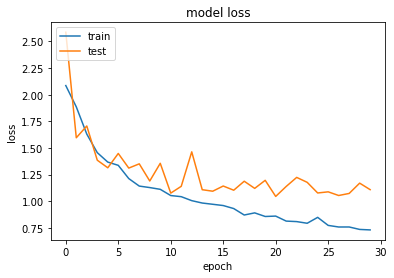

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

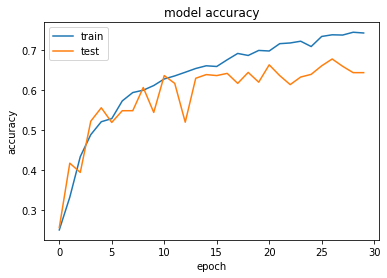

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

##Testing

In [ ]:
y_pred = model.predict(X_test)
new_pred = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
  new_pred[i] = np.argmax(y_pred[i])
print("Testing Accuracy: ", sklearn.metrics.accuracy_score(y_true=y_test, y_pred=new_pred))

Testing Accuracy:  0.6601705237515225


In [ ]:
print(sklearn.metrics.classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           0       0.52      0.60      0.55       141
           1       0.61      0.56      0.58       144
           2       0.64      0.51      0.57       133
           3       0.64      0.74      0.69       132
           4       0.81      0.80      0.80       137
           5       0.96      0.94      0.95       126
           6       0.78      0.65      0.71       155
           7       0.94      0.90      0.92       124
           8       0.96      0.91      0.93       142
           9       0.68      0.48      0.57       128
          10       0.30      0.46      0.36       132
          11       0.42      0.42      0.42       148

    accuracy                           0.66      1642
   macro avg       0.69      0.66      0.67      1642
weighted avg       0.68      0.66      0.67      1642



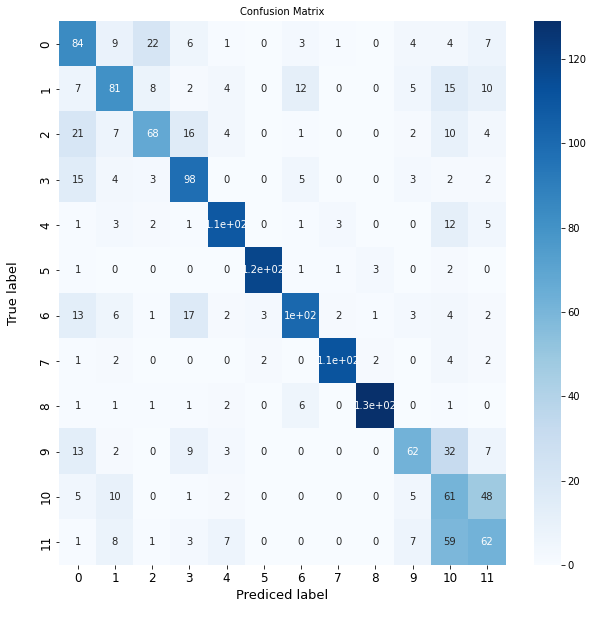

In [ ]:
import seaborn as sns
cm = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=new_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title("Confusion Matrix", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.ylabel('True label\n', fontsize=13)
plt.xlabel('Prediced label\n', fontsize=13)
plt.show()

In [ ]:
for i in range(len(cm)):
  den = sum(cm[i])
  num = cm[i][i]
  accuracy = num/den
  print("Accuracy for gesture", i)
  print(str(accuracy*100)+"%")
  print(' ')

Accuracy for gesture 0
59.57446808510638%
 
Accuracy for gesture 1
56.25%
 
Accuracy for gesture 2
51.127819548872175%
 
Accuracy for gesture 3
74.24242424242425%
 
Accuracy for gesture 4
79.56204379562044%
 
Accuracy for gesture 5
93.65079365079364%
 
Accuracy for gesture 6
65.16129032258064%
 
Accuracy for gesture 7
89.51612903225806%
 
Accuracy for gesture 8
90.84507042253522%
 
Accuracy for gesture 9
48.4375%
 
Accuracy for gesture 10
46.21212121212121%
 
Accuracy for gesture 11
41.891891891891895%
 


# GRU

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape=(299,80)),   
tf.keras.layers.GRU(128, return_sequences=True),
tf.keras.layers.GRU(128, return_sequences=True, dropout=0.1),
tf.keras.layers.Conv1D(60, 1, activation='relu', padding='same'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(12, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 299, 128)          80640     
                                                                 
 gru_1 (GRU)                 (None, 299, 128)          99072     
                                                                 
 conv1d (Conv1D)             (None, 299, 60)           7740      
                                                                 
 flatten (Flatten)           (None, 17940)             0         
                                                                 
 dense (Dense)               (None, 12)                215292    
                                                                 
Total params: 402,744
Trainable params: 402,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          batch_size=10,
          epochs=30, shuffle=True)

Epoch 1/30
800/800 [==============================] - 312s 385ms/step - loss: 2.5065 - accuracy: 0.1482 - val_loss: 2.0867 - val_accuracy: 0.3477
Epoch 2/30
800/800 [==============================] - 314s 392ms/step - loss: 1.6800 - accuracy: 0.4574 - val_loss: 1.7478 - val_accuracy: 0.4738
Epoch 3/30
800/800 [==============================] - 314s 393ms/step - loss: 1.3797 - accuracy: 0.5470 - val_loss: 1.4419 - val_accuracy: 0.5920
Epoch 4/30
800/800 [==============================] - 316s 395ms/step - loss: 1.2350 - accuracy: 0.5905 - val_loss: 1.1987 - val_accuracy: 0.5859
Epoch 5/30
800/800 [==============================] - 317s 397ms/step - loss: 1.1493 - accuracy: 0.6281 - val_loss: 1.5661 - val_accuracy: 0.4744
Epoch 6/30
800/800 [==============================] - 317s 397ms/step - loss: 1.0924 - accuracy: 0.6470 - val_loss: 1.3186 - val_accuracy: 0.5810
Epoch 7/30
800/800 [==============================] - 314s 392ms/step - loss: 1.0426 - accuracy: 0.6635 - val_loss: 1.3933 -

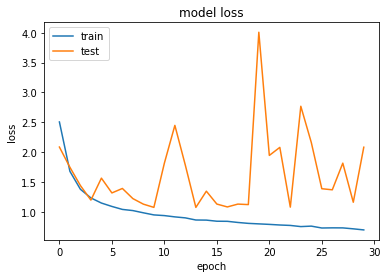

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

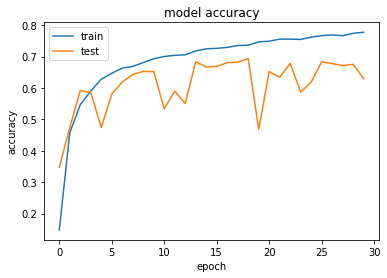

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
y_pred = model.predict(X_test)
new_pred = np.zeros(y_pred.shape[0])
for i in range(y_pred.shape[0]):
  new_pred[i] = np.argmax(y_pred[i])
print("Testing Accuracy: ", sklearn.metrics.accuracy_score(y_true=y_test, y_pred=new_pred))

Testing Accuracy:  0.6382460414129111


In [ ]:
print(sklearn.metrics.classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           0       0.54      0.66      0.59       141
           1       0.45      0.36      0.40       144
           2       0.62      0.56      0.58       133
           3       0.45      0.72      0.55       132
           4       0.94      0.34      0.49       137
           5       0.93      0.95      0.94       126
           6       0.76      0.79      0.77       155
           7       0.98      0.90      0.94       124
           8       0.98      0.85      0.91       142
           9       0.63      0.53      0.58       128
          10       0.41      0.38      0.39       132
          11       0.44      0.65      0.53       148

    accuracy                           0.64      1642
   macro avg       0.68      0.64      0.64      1642
weighted avg       0.67      0.64      0.64      1642



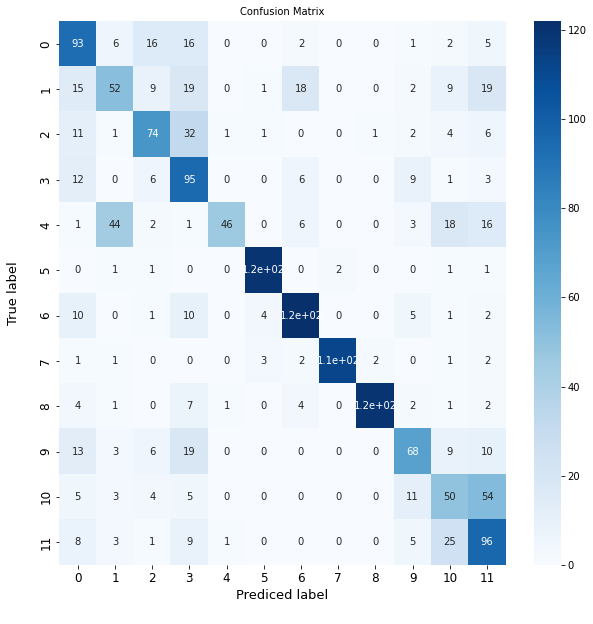

In [ ]:
import seaborn as sns
cm = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=new_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title("Confusion Matrix", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.ylabel('True label\n', fontsize=13)
plt.xlabel('Prediced label\n', fontsize=13)
plt.show()

In [ ]:
for i in range(len(cm)):
  den = sum(cm[i])
  num = cm[i][i]
  accuracy = num/den
  print("Accuracy for gesture", i)
  print(str(accuracy*100)+"%")
  print(' ')

Accuracy for gesture 0
65.95744680851064%
 
Accuracy for gesture 1
36.11111111111111%
 
Accuracy for gesture 2
55.639097744360896%
 
Accuracy for gesture 3
71.96969696969697%
 
Accuracy for gesture 4
33.57664233576642%
 
Accuracy for gesture 5
95.23809523809523%
 
Accuracy for gesture 6
78.70967741935485%
 
Accuracy for gesture 7
90.32258064516128%
 
Accuracy for gesture 8
84.50704225352112%
 
Accuracy for gesture 9
53.125%
 
Accuracy for gesture 10
37.878787878787875%
 
Accuracy for gesture 11
64.86486486486487%
 
